In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [3]:
# number of samples per class
num_samp_per_class = 10000
# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 1024 #2048
# number of overlapping samples for the STFT operation
fft_overlap = 256
labels = ["md5", "nothing", "sha1"]

In [4]:
mfiles = [
    "C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m78_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m79_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m77_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m78_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m79_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m81_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m82_1.cfile"
]

class_label = 0
data = getData("C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m77_1.cfile")
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
del data
Zxx = Zxx.transpose()
X = Zxx[0:num_samp_per_class]
y = np.full(num_samp_per_class, class_label)

for i in range(1,29):
    X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
    y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
    
print("C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m77_1.cfile")
print(len(f))
print(len(t))
print(Zxx.shape)
print("---------")
del Zxx

for j in range(7):
    data = getData(mfiles[j])
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    del data
    Zxx = Zxx.transpose()
    for i in range(30):
        X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
        y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
    print(mfiles[j])
    print(len(f))
    print(len(t))
    print(Zxx.shape)
    print("---------")
    del Zxx
    

C:\Users\gayan\anaconda3\envs\Research\lib\site-packages\scipy\signal\_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m77_1.cfile
1024
536752
(536752, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m78_1.cfile
1024
468757
(468757, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day5/md5Loop/m79_1.cfile
1024
512429
(512429, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m77_1.cfile
1024
440399
(440399, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m78_1.cfile
1024
436602
(436602, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m79_1.cfile
1024
443057
(443057, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m81_1.cfile
1024
371126
(371126, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/md5Loop/m82_1.cfile
1024
385052
(385052, 1024)
---------


In [5]:
nfiles = [
    "C:/Users/gayan/Documents/Gayan/Day5/nothing/n77_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day5/nothing/n78_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day5/nothing/n79_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/nothing/n77_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/nothing/n78_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/nothing/n79_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/nothing/n81_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/nothing/n82_1.cfile"
]

class_label = 1
for j in range(8):
    data = getData(nfiles[j])
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    del data
    Zxx = Zxx.transpose()
    for i in range(30):
        X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
        y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
    print(nfiles[j])
    print(len(f))
    print(len(t))
    print(Zxx.shape)
    print("---------")
    del Zxx
    
    

C:/Users/gayan/Documents/Gayan/Day5/nothing/n77_1.cfile
1024
501745
(501745, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day5/nothing/n78_1.cfile
1024
488045
(488045, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day5/nothing/n79_1.cfile
1024
540674
(540674, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/nothing/n77_1.cfile
1024
501313
(501313, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/nothing/n78_1.cfile
1024
498029
(498029, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/nothing/n79_1.cfile
1024
492109
(492109, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/nothing/n81_1.cfile
1024
519249
(519249, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/nothing/n82_1.cfile
1024
491656
(491656, 1024)
---------


In [6]:
sfiles = [
    "C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s77_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s78_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s79_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s77_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s78_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s79_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s81_1.cfile",
    "C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s82_1.cfile"
]

class_label = 2
for j in range(8):
    data = getData(sfiles[j])
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    del data
    Zxx = Zxx.transpose()
    for i in range(30):
        X = np.concatenate((X, Zxx[num_samp_per_class*i:((num_samp_per_class*(i+1)))]), axis=0) 
        y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
    print(sfiles[j])
    print(len(f))
    print(len(t))
    print(Zxx.shape)
    print("---------")
    del Zxx
    
    

C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s77_1.cfile
1024
478799
(478799, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s78_1.cfile
1024
469147
(469147, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day5/shaLoop/s79_1.cfile
1024
629824
(629824, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s77_1.cfile
1024
541381
(541381, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s78_1.cfile
1024
515757
(515757, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s79_1.cfile
1024
449221
(449221, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s81_1.cfile
1024
349220
(349220, 1024)
---------
C:/Users/gayan/Documents/Gayan/Day6/shaLoop/s82_1.cfile
1024
443673
(443673, 1024)
---------


In [7]:
print(X.shape)
print(y.shape)
print("---------")
X = abs(X)
# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(X)
#print(scaler.data_max_)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))

model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))
model.summary()

(7190000, 1024)
(7190000,)
---------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               820000    
                                                                 
 dense_1 (Dense)             (None, 500)               400500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,346

(6471000, 1024)
(6471000,)
Epoch 1/30
181997/181997 [==============================] - 622s 3ms/step - loss: 0.5933 - accuracy: 0.7181 - val_loss: 0.4263 - val_accuracy: 0.8062
Epoch 2/30
181997/181997 [==============================] - 658s 4ms/step - loss: 0.3827 - accuracy: 0.8295 - val_loss: 0.3515 - val_accuracy: 0.8459
Epoch 3/30
181997/181997 [==============================] - 692s 4ms/step - loss: 0.3382 - accuracy: 0.8530 - val_loss: 0.3236 - val_accuracy: 0.8595
Epoch 4/30
181997/181997 [==============================] - 630s 3ms/step - loss: 0.3199 - accuracy: 0.8623 - val_loss: 0.3129 - val_accuracy: 0.8654
Epoch 5/30
181997/181997 [==============================] - 635s 3ms/step - loss: 0.3056 - accuracy: 0.8698 - val_loss: 0.2951 - val_accuracy: 0.8754
Epoch 6/30
181997/181997 [==============================] - 631s 3ms/step - loss: 0.2867 - accuracy: 0.8789 - val_loss: 0.2759 - val_accuracy: 0.8834
Epoch 7/30
181997/181997 [==============================] - 641s 4ms/step

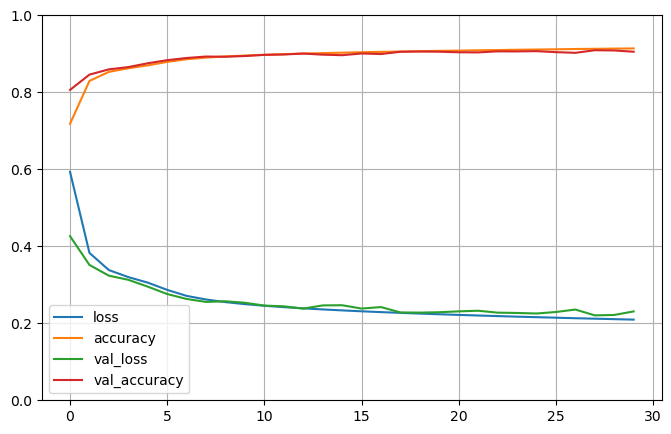

22469/22469 [==============================] - 50s 2ms/step - loss: 0.2316 - accuracy: 0.9047
test loss, test acc: [0.23161296546459198, 0.9047454595565796]
22469/22469 [==============================] - 48s 2ms/step
[2 1 1 ... 2 1 0]
2
[[220461   8395   9973]
 [  8837 228514   2549]
 [ 33751   4983 201537]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88    238829
           1       0.94      0.95      0.95    239900
           2       0.94      0.84      0.89    240271

    accuracy                           0.90    719000
   macro avg       0.91      0.90      0.90    719000
weighted avg       0.91      0.90      0.90    719000



In [8]:
print(X_train.shape)
print(y_train.shape)

opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("./model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

model.save("./model.h5") 

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

model = keras.models.load_model("./model.h5")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)
#y_pred = model.predict(X_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

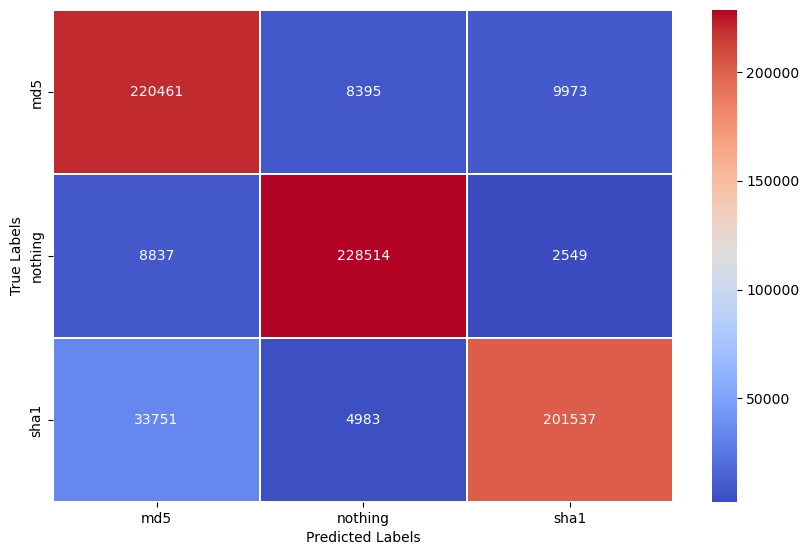

<Figure size 640x480 with 0 Axes>

In [11]:
f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, cmap="coolwarm",fmt='.0f',linewidths=.05, yticklabels=["md5", "nothing", "sha1"], xticklabels=["md5", "nothing", "sha1"])
f.subplots_adjust(top=0.93)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
plt.savefig('hash_confusion_matrix.pdf', format='pdf', bbox_inches='tight')